In [9]:
import pandas as pd
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
# Wczytanie danych z pliku CSV
data = pd.read_csv('550-images.csv') 
# Wyświetlenie pierwszych kilku wierszy danych
print(data.head())

   user_id  lux_value sign_label  vector_hand_1_x  vector_hand_1_y  \
0        1        550          A           -0.412            0.869   
1        1        550          A            0.182           -0.933   
2        1        550          A            0.171           -0.932   
3        1        550          A            0.127           -0.945   
4        1        550          A           -0.147           -0.957   

   vector_hand_1_z  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  ...  \
0            0.276          4          4          4          4  ...   
1           -0.312          4          4          4          4  ...   
2           -0.320          4          4          4          4  ...   
3           -0.301          4          4          4          4  ...   
4           -0.252          4          4          4          4  ...   

   pixel_3_1591  pixel_3_1592  pixel_3_1593  pixel_3_1594  pixel_3_1595  \
0           110           106            98            78            27   
1 

In [5]:
# Przygotowanie danych dotyczących pikseli
pixels_columns = [col for col in data.columns if col.startswith('pixel')]
print(pixels_columns)
print(data.columns)
# Przekształcenie danych do postaci macierzy pikseli
pixels_data = data[pixels_columns].values

# Przekształcenie danych pikseli do postaci obrazu
image_data = pixels_data.reshape(-1, 40, 40)  # Przykładowa wielkość obrazu - należy dostosować do faktycznych rozmiarów
print(pixels_data.shape)  # Wyświetlenie rozmiaru macierzy pikseli



['pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_1_8', 'pixel_1_9', 'pixel_1_10', 'pixel_1_11', 'pixel_1_12', 'pixel_1_13', 'pixel_1_14', 'pixel_1_15', 'pixel_1_16', 'pixel_1_17', 'pixel_1_18', 'pixel_1_19', 'pixel_1_20', 'pixel_1_21', 'pixel_1_22', 'pixel_1_23', 'pixel_1_24', 'pixel_1_25', 'pixel_1_26', 'pixel_1_27', 'pixel_1_28', 'pixel_1_29', 'pixel_1_30', 'pixel_1_31', 'pixel_1_32', 'pixel_1_33', 'pixel_1_34', 'pixel_1_35', 'pixel_1_36', 'pixel_1_37', 'pixel_1_38', 'pixel_1_39', 'pixel_1_40', 'pixel_1_41', 'pixel_1_42', 'pixel_1_43', 'pixel_1_44', 'pixel_1_45', 'pixel_1_46', 'pixel_1_47', 'pixel_1_48', 'pixel_1_49', 'pixel_1_50', 'pixel_1_51', 'pixel_1_52', 'pixel_1_53', 'pixel_1_54', 'pixel_1_55', 'pixel_1_56', 'pixel_1_57', 'pixel_1_58', 'pixel_1_59', 'pixel_1_60', 'pixel_1_61', 'pixel_1_62', 'pixel_1_63', 'pixel_1_64', 'pixel_1_65', 'pixel_1_66', 'pixel_1_67', 'pixel_1_68', 'pixel_1_69', 'pixel_1_70', 'pixel_1_71', 'pixel_1_72', 

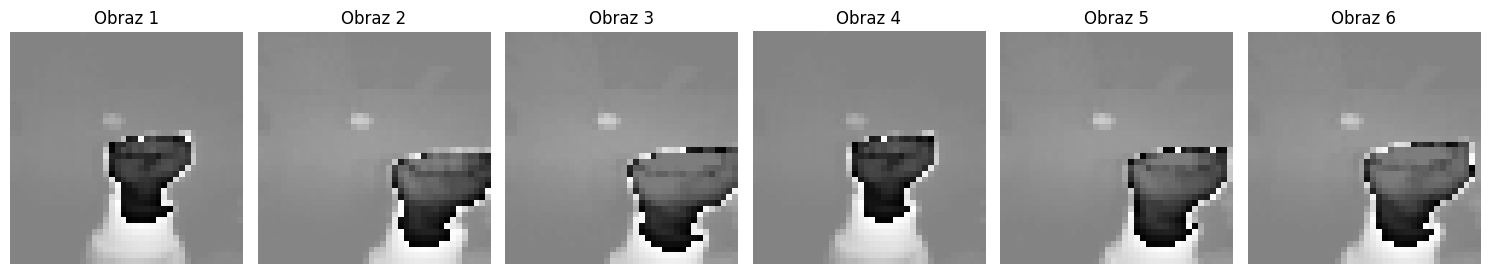

In [6]:
# Wyświetlenie pierwszych 4 obrazów
fig, axs = plt.subplots(1, 6, figsize=(15, 5))  # Tworzenie figury z 4 subplotami

for i in range(6):
    axs[i].imshow(image_data[i], cmap='gray')  # Wyświetlenie każdego z pierwszych 4 obrazów
    axs[i].set_title(f'Obraz {i+1}')  # Dodanie tytułu dla każdego obrazu
    axs[i].axis('off')  # Wyłączenie osi dla czytelności

plt.tight_layout()  # Upewnienie się, że podpisy i obrazy są dobrze ułożone
plt.show()

Trying to add landmarks to images

In [7]:
def detect_hand_landmarks(image):
    image_gray = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    image_with_landmarks = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
    results = hands.process(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                h, w = image_gray.shape[:2]
                cx, cy = int(landmark.x * w), int(landmark.y * h)
                cv2.circle(image_with_landmarks, (cx, cy), 5, (255, 0, 0), cv2.FILLED)

            # Indeksy kluczowych punktów charakterystycznych dłoni
            keypoint_indices = [0, 4, 8, 12, 16, 20]  # Można dostosować, w zależności od potrzeb

            # Rysowanie tylko kluczowych punktów charakterystycznych
            for idx in keypoint_indices:
                landmark = hand_landmarks.landmark[idx]
                cx, cy = int(landmark.x * w), int(landmark.y * h)
                cv2.circle(image_with_landmarks, (cx, cy), 5, (0, 255, 0), cv2.FILLED)

    hands.close()
    return image_with_landmarks

I0000 00:00:1704826365.397132   98691 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1704826365.413027   98774 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.129.03), renderer: NVIDIA GeForce GTX 970/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1704826365.483923   98691 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1704826365.490580   98783 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.129.03), renderer: NVIDIA GeForce GTX 970/PCIe/SSE2
I0000 00:00:1704826365.538632   98691 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1704826365.545059   98792 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.129.03), renderer: NVIDIA GeForce GTX 970/PCIe/SSE2
I0000 00:00:1704826365.608094   98691 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1704826365.614508   98801 gl_context.cc:344

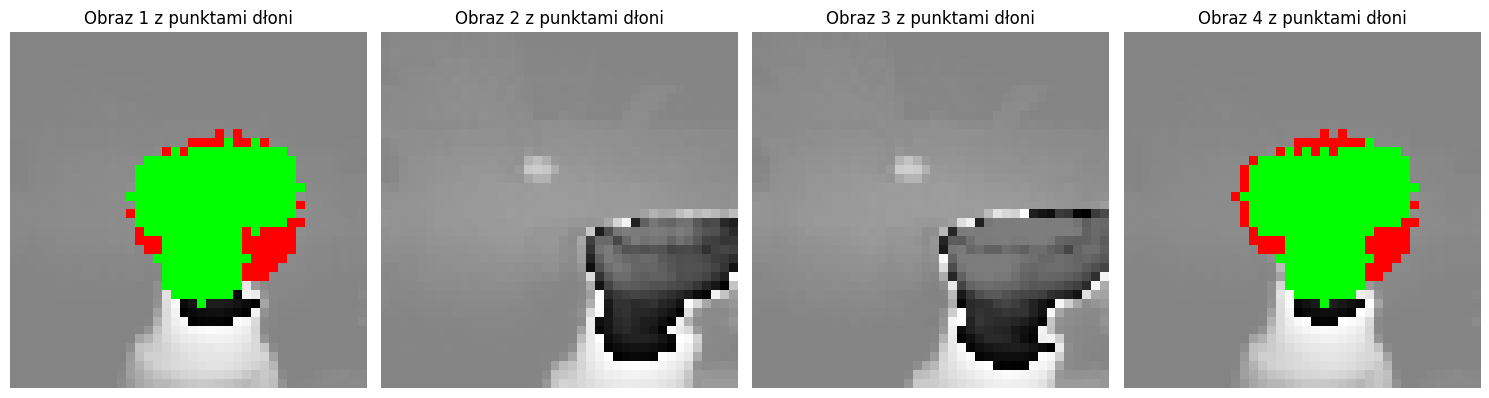

In [10]:
# Wyświetlenie pierwszych 4 obrazów z nałożonymi punktami charakterystycznymi dłoni
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    image_with_landmarks = detect_hand_landmarks(image_data[i])
    axs[i].imshow(image_with_landmarks)
    axs[i].set_title(f'Obraz {i+1} z punktami dłoni')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Trying to resolve problem with painting on images

In [11]:
def detect_hand_landmarks(image):
    image_with_landmarks = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Konwersja na obraz w kolorze BGR

    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))  # Konwersja na obraz w kolorze RGB

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                h, w, c = image_with_landmarks.shape
                cx, cy = int(landmark.x * w), int(landmark.y * h)
                cv2.circle(image_with_landmarks, (cx, cy), 5, (255, 0, 0), cv2.FILLED)

    hands.close()
    return image_with_landmarks

In [12]:
# Użyj funkcji na przykładowym obrazie
example_image_with_landmarks = detect_hand_landmarks(image_data[0])  # Przykładowy obraz w skali szarości

# Wyświetl obraz z nałożonymi punktami charakterystycznymi dłoni
plt.imshow(example_image_with_landmarks)
plt.title('Obraz z punktami charakterystycznymi dłoni')
plt.axis('off')
plt.show()

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)
